### Изучение закономерностей, определяющих успешность игр.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


*Данные за 2016 год могут быть неполными.*

**Ход работы**
* открыть файл 
* прочитать данные
* перичный осмотр данных
* выявить ошибки в данных
* заполнить пропуски по возможности
* исправить типы данных
* рассчитать дополнительные параметры 
* провести исследовательский анализ данных
* составить портрет пользователя 
* проверить гипотезы

### Шаг 1. Откройте файл с данными и изучите общую информацию

импорт необходимых для работы библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings 

Отключаем сообщения об ошибках.

In [2]:
warnings.simplefilter("ignore")

Вводим класс, который я использую для выделения цветов или же другого форматирования.

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

сохраняем наш датасет с именем **games**, используя **pd.read_csv**

In [4]:
games = pd.read_csv("/datasets/games.csv", sep=",")

выводим на экран первые 10 строк.

In [5]:
display(games.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Первичный осмотр таблицы показал, что у нас есть пропуски в столбцах:
* Critic_Score
* User_Score
* Rating

Проверим подробнее с помощью **isnull().sum()**

In [6]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

При подробно рассмотрении пропусков обнаружили их в столбцах:
* name
* genre
* year_of_release
* Critic_score
* User_score
* Rating

Проверим форматы данных.

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Ошибочный формат обнаружили в ячейках:
* year_of_release - сейчас float64- корректный формат Int64 так как год целое число ( не смотря на то, что это год, формат datetime тут не нужен)
* user_score -сейчас object -  коррктный формат float64 так как оценка это число

### Вывод
После первичного осмотра данных стало ясно, что у нас есть пропуски в столбцах:
* genre
* name
* critic_score
* user_score
* year_of_release
* rating

Которые необходимо обработать.

И неверный формат в двух столбцах: 
* user_score
* year_of_release



### Шаг 2. Подготовьте данные


В этом шаге нашей работы необходимо выполнить следующее:
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;       
    
*Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;*
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Замените названия столбцов (приведите к нижнему регистру);

Создаем пустой список в который будем записывать названия столбцов в ниженем регистре.
используем циклы **for**, для вывоза названий столбцов **columns**, а для переводе в нижний регистр **lower**

In [8]:
new_names=[]
for name in games.columns:
    new_names.append(name.lower())
    

Присваиваем названия столбцов в нижнем регистре.

In [9]:
games.columns = new_names

Проверяем результат.

In [10]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Всё ок, двигаемся дальше.

#### Обработка пропусков

У нас есть пропуски с столбца:
* name
* year_of_release
* genre
* critic_score
* user_score
* rating

In [11]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Обработка пропусков в столбце **Genre**

Начнём со столбца genre. Выведем строки с пропусков в этом столбце.

In [12]:
display(games[games['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две старые игры.
Платформа GEN явно уже не будет перспективной в 2016 году, у этих игр нет никаких оценок и рейтинга, да и жанр не указан. Мы никак не сможем восстановить эти данные. 

Поэтому считаю мы можем их спокойно удалить, не потеряв в достоверности всего датасета.


Удаляем строки с помощью **dropna**

In [13]:
games.dropna(subset = ['name'], inplace = True)

Проверим пропуски вновь.

In [14]:
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Всё хорошо, двигаеся дальше.

#### Обработка пропусков в столбце year_of_release

In [15]:
print('Пустых строк в столбце:',games["year_of_release"].isnull().sum())

Пустых строк в столбце: 269


Предположим, что у одних и тех же игр на одной платформе указан год на другой нет.   
Проверим эту гипотезу.

заменим все пропуски на нетипичное значени **-1** с помощью **fillna**

In [16]:
games["year_of_release"].fillna(-1, inplace=True)

создаем новую таблицу отфильтрованную по году = -1.

In [17]:
game_without_year_list_values = games[games['year_of_release'] == -1]

оставляем только названия игр

In [18]:
game_without_year_list_values = game_without_year_list_values['name']

создаем список и записываем туда названия игр с помощь цикла **for**

In [19]:
game_without_year_list = []
for name in game_without_year_list_values:
    game_without_year_list.append(name)

Проверяем есть ли у нас игры на разных платформах, где на одной из них год проставлен.

In [20]:
games.query('name in @game_without_year_list').pivot_table(index=['name','platform'], values='year_of_release')

year_of_release
name                                       platform                 
AKB1/48: Idol to Guam de Koishitara...     PSP                2011.0
                                           X360                 -1.0
Action Man-Operation Extreme               PS                   -1.0
Advance Wars: Days of Ruin                 DS                   -1.0
Adventure                                  2600                 -1.0
...                                                              ...
Yu Yu Hakusho: Dark Tournament             PS2                  -1.0
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales) Wii                  -1.0
Zero: Tsukihami no Kamen                   Wii                  -1.0
eJay Clubworld                             PS2                  -1.0
wwe Smackdown vs. Raw 2006                 PS2                  -1.0

[472 rows x 1 columns]

При первичном беглом осмотре видно, что как миним в одной игре (AKB1/48: Idol to Guam de Koishitara) наша теория подтвердилась. Поэтому данный метод можно использовать, он позволит избавится от части пропусков.

Создаем словарь со списком игр и годом их выхода c с помощью группировки **groupby() и to_ditc()**

In [21]:
games_year_dict = games.query('year_of_release >0').groupby('name')['year_of_release'].max().to_dict()

Пишем формулу, которая заменяем **-1** на значения из нашего списка.

In [22]:
def year_of_release(row):
    if row["year_of_release"] == -1:
        if row['name'] in games_year_dict:
            return games_year_dict[row['name']]
    return row["year_of_release"]

Применяем формулу.

In [23]:
games['year_of_release'] = games.apply(year_of_release, axis=1)

Проверяем результат.

In [24]:
games.query('year_of_release == -1')['year_of_release'].count()

146

Количество пропусков уменьшилось вдвое.

Так как у нас больше нет способов заполнить пропуски (медианы и средние значения в данном случае не подойдут) меняем -1 обратно на NaN с помощью **np.nan**

In [25]:
games['year_of_release'].replace(-1,np.nan, inplace=True)

Проверяем замену.

In [26]:
games.isnull().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Замена прошла успешно, мы избавились от половины пропусков и не исказили данные. Двигаемся дальше.

#### Обработка пропусков в столбце critic_score

In [27]:
print('Пустых строк в столбце:',games["critic_score"].isnull().sum())

Пустых строк в столбце: 8576


Пробуем применить аналогичный способ заполнения, как и прошлом пункте. Позаимствуем значения с других платформ. Такую же проверку на их наличие проводить не будет, так как при первичном осмотре было видно, что такие игры есть и нам есть откуда взять данные.

Меняем все пропуски на нетипичные значения **-1** с помощью **fillna**

In [28]:
games["critic_score"].fillna(-1, inplace=True)

Создаем словарь с названием игры и средней оценкой.

In [29]:
critic_score_dict = games.query('critic_score > 0').groupby('name')['critic_score'].mean().to_dict()

Пишем формулу для заполнения пропусков.

In [30]:
def critic_score_by_name(row):
    if row["critic_score"] == -1:
        if row['name'] in critic_score_dict:
            return critic_score_dict[row['name']]
    return row["critic_score"]

Применяем формулу.

In [31]:
games['critic_score'] = games.apply(critic_score_by_name, axis=1)

Проверяем сколько пропусков у нас осталось.

In [32]:
games.query('critic_score == -1')['critic_score'].count()

7615

Нам удалось заполнить часть пропусков, но этого недостаточно.

Используем другой метод заполнения пропусков.

Предположим, что игры одного жанра и одного года имеют примерно одинаковый рейтинг.
Например могу предположить, что в год проведения олимпиады, спортивные игры явно более интересны пользователям или в год выхода фильма форсаж резко подскочила популярность гонок (NFS в школьные годы привет).

Создаем список в котором ключами будет жанр и год, а значением среднее по этому жанру и году соотвественно.

In [33]:
critic_score_by_genre_and_year = games.query('critic_score>0').groupby(['genre','year_of_release'])['critic_score'].mean().to_dict()

Пишем функцию аналогичную предыдущей, только используем два ключа.

In [34]:
def critic_score_by_genre(row):
    if row['critic_score'] == -1:
        if (row['genre'], row['year_of_release']) in critic_score_by_genre_and_year:
            return critic_score_by_genre_and_year[(row['genre'],row['year_of_release'])]
    return row['critic_score']

Применяем фукнцию.

In [35]:
games['critic_score'] = games.apply(critic_score_by_genre, axis = 1)

Проверяем сколько осталось данных незаполненными. 

In [36]:
games.query('critic_score == -1')['critic_score'].count()

707

Пропусков осталось совсем немного, мы можем попробовать применить корреляцию с другими столбцами для заполнения, но самый близкий по смыслу столбец **user_score** имеет текстовые значения и расчёт корреляции невозможен, поэтому мы вернёмся к этому позже, когда разберёмся с этим столбцом.

#### Обработка пропусков в столбце user_score:

In [37]:
print('Пустых строк в столбце:',games["user_score"].isnull().sum())

Пустых строк в столбце: 6699


В задание к проекту было указано, что стоит обратить внимания на значения **tbd** , посмотрим сколько строк имеют такие значения.

In [38]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
1.1       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

2424 строки, довольно большое значения. 
Судя по [источникам в интеренет ](https://dic.academic.ru/dic.nsf/muller/1043210) **TDB** абривиатура от TBD To Be Determined подлежит определению. То есть могу предположить, что оценки от игроков будут позже. В таком случае думаю не стоит их заполнить, т.к. если у нас появятся новые данные и мы захотим обновить датасет эти строки будут искуственно заполнены, придётся вручную искать эти значения, а не обновлять функцией.

Поэтому я думаю уместно заполнить их нетипичным значениям -2 для моего удосбтва, а в дальнейшем вернуть пустое значение NaN, чтобы не искажать данные (и появилась возможность сменить тип данных и рассчитать корреляцию), которые в конечном итоге могут быть заполненым корректными данными.

In [39]:
games['user_score'].replace('tbd', -2, inplace=True)


Остальные же пропуски мы заполним **-1** и будем с ними работать.

In [40]:
games['user_score'].fillna(-1, inplace=True)

Теперь мы можем перевести столбец в нужный тип данных

In [41]:
games['user_score'] = games['user_score'].astype('Float64')

Аналогично как и в предыдущем шаге попробуем заполнить пропуски с помощью данных игры с других платформ.

Создаем словарь содержащий, название игры и средний рейтинг.

In [42]:
user_score_dict = games.query('user_score >0').groupby('name')['user_score'].mean().to_dict()

Пишем функцию заполнения.

In [43]:
def user_score_by_name (row):
    if row['user_score'] == -1:
        if row['name'] in user_score_dict:
            return user_score_dict[row['name']]
    return row['user_score']
            

Применяем функцию.

In [44]:
games['user_score'] = games.apply(user_score_by_name, axis = 1 )

Проверяем сколько у нас осталось не заполненый строк ( -2 не учитываем, так как с ними мы работать не будем)

In [45]:
games.query('user_score == -1')['user_score'].count()

6348

Пропусков стало немного меньше.

Пробуем заполнить аналогично, как и в прошлом пункте с помощью среднего по жанрам и годам.

Создаем словарь.

In [46]:
user_score_by_genre_and_year = games.query('user_score>0').groupby(['genre','year_of_release'])['user_score'].mean().to_dict()

Пишем функцию.

In [47]:
def user_score_by_genre(row):
    if row['user_score'] == -1:
        if (row['genre'], row['year_of_release']) in user_score_by_genre_and_year:
            return user_score_by_genre_and_year[(row['genre'],row['year_of_release'])]
    return row['user_score']

Применяем функцию.

In [48]:
games['user_score'] = games.apply(user_score_by_genre, axis = 1)

Смотрим сколько осталось незаполненых значений.

In [49]:
games.query('user_score == -1')['user_score'].count()

656

In [50]:
games.isnull().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

Осталось совсем немного, далее попробуем применить корреляцию для заполнения этих пропусков.

In [51]:
print(games.query('critic_score > 0')['critic_score'].corr(games.query('user_score > 0')['user_score']))

0.5553585020967312


корреляция средняя, но это лучше чем ничего. Будем заполнять.

Создаем новый столбец, который будет содержать частное от деления critic_score на user_score. Так мы сможем понять во сколько раз crititc score больше user_score.

In [52]:
games['coef_score'] = games['critic_score'] / games['user_score']

проверяем результат.

In [53]:
display(games.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,coef_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,9.500000
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.000000,-1.000000,NaN,1.000000
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,9.879518
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,10.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,94.000000,8.700000,NaN,10.804598
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.000000,-1.000000,NaN,1.000000
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,10.470588
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,8.787879
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E,10.357143
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.000000,-1.000000,NaN,1.000000


столбец добавился корректно, двигаемся дальше.

Найдём среднее по столбцу, чтобы понять на сколько в среднем одно значение больше другого (исключая минусовые значения в обоих столбцах)

In [54]:
coef= games.query('coef_score>0 and user_score >0')['coef_score'].mean()

In [55]:
print(coef)

10.10629657753977


Пишем функцию, заполняющую нетипичные значения в **user_score** делённым на коэффицент(coef) значением **critic_score**

In [56]:
def coef_user(row):
    if (row['user_score'] == -1 and row['critic_score'] >0):
        return (row['critic_score'] / coef)
    else:
        return row['user_score']

применяем функцию.

In [57]:
games['user_score'] = games.apply(coef_user, axis=1)

Проверяем результат.

In [58]:
display(games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,coef_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,9.500000
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,1.000000
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,9.879518
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,10.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,94.0,8.7,NaN,10.804598
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,1.000000
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,10.470588
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,8.787879
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,10.357143
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,1.000000


Проверяем сколько значений удалось заполнить.

In [59]:
games.query('user_score == -1')['user_score'].count()

644

Удалось заполнить совсем немного, двигаемся дальше.

Пишем аналогичную функцию для **critic_score**

In [60]:
def coef_critic(row):
    if row['critic_score'] == -1 and row['user_score']>0 :
        return row['user_score'] * coef
    else:
        return row['critic_score']

Применяем функцию.

In [61]:
games['critic_score'] = games.apply(coef_critic, axis=1)

Проверяем результат.

In [62]:
display(games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,coef_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,9.500000
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,1.000000
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,9.879518
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,10.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,94.0,8.7,NaN,10.804598
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,1.000000
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,10.470588
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,8.787879
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,10.357143
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,1.000000


Проверяем сколько значений удалось заполнить.

In [63]:
games.query('critic_score == -1')['critic_score'].count()

663

Тоже немного значений удалось заполнить, но других способов более менее достоверно заполнить пропуски нет.

Поэтому мы возвращаем NaN для всех нетипичных значений, чтобы они не мешались нам в дальнейших расчётах.

In [64]:
games['user_score'].replace(-2,np.nan , inplace=True)

In [65]:
games['user_score'].replace(-1,np.nan , inplace=True)

In [66]:
games['critic_score'].replace(-1,np.nan , inplace=True)

Смотрим на таблтцу после замен.

In [67]:
display(games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,coef_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,9.500000
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1.000000
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,9.879518
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,10.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,94.0,8.7,NaN,10.804598
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,1.000000
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,10.470588
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,8.787879
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,10.357143
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1.000000


Пустые значения вернулись корректно, двигаемся дальше.

#### Обработка пропусков в столбце rating:

In [68]:
print('Пустых строк в столбце:',games["rating"].isnull().sum())

Пустых строк в столбце: 6764


Для заполнения пропусков анлогично как и в прошлых шагах будем использовать данные других платформ одной и той же игры.

Создаем список с названиями рейтингов.

In [69]:
rating_list = games['rating'].unique()

In [70]:
display(rating_list)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Создаем словари, которые будем использовать в дальнейшем.
Так как текстовые значения невозможно использовать присваиваем им условное кодовое обозначение.

In [71]:
rating_dict = {
    'E':1,
    'M':2,
    'T':3,
    'E10+':4,
    'K-A':5,
    'AO':6,
    'EC':7,
    'RP':8
}

In [72]:
rating_dict_by_code = {
    1:'E',
    2:'M',
    3:'T',
    4:'E10+',
    5:'K-A',
    6:'AO',
    7:'EC',
    8:'RP'
}

Заменяем пропуски на нетипичные значения.

In [73]:
games['rating'].fillna(-1, inplace=True)

пишем функцию, для создания нового столбца с условными обозначениями рейтингов.

In [74]:
def rating_code(row):
    if row['rating'] != -1:
        return rating_dict[row['rating']]
    else:
        return row['rating']


Применяем функцию и создаем столбец с условными обозначениями.

In [75]:
games['rating_code'] = games.apply(rating_code, axis=1)

Проверяем результат.

In [76]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,coef_score,rating_code
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,9.500000,1
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,1.000000,-1
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,9.879518,1
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,10.000000,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,94.0,8.7,-1,10.804598,-1


Столбец добавился корректно.

Создаем словарь с названием игры и условным обозначением рейтинга.

In [77]:
rating_by_names = games[games['rating_code'] >0].groupby('name')['rating_code'].max().to_dict()

Пишем функцию для замены -1 на значения рейтинга из других платформ.

In [78]:
def rating_by_name(row):
    if row['rating'] == -1:
        if row['name'] in rating_by_names:
            return rating_dict_by_code[rating_by_names[row['name']]]
        else: 
            return row['rating']
    else:
        return row['rating']

Применяем функцию.

In [79]:
games['rating'] = games.apply(rating_by_name, axis=1)

Проверяем сколько знаений удалось заполнить.

In [80]:
games['rating'].value_counts()

-1      6327
E       4146
T       3092
M       1653
E10+    1476
EC        10
RP         4
K-A        4
AO         1
Name: rating, dtype: int64

Удалось, заполнить около 400 значений, так как у нас больше нет способа заполнить пропуски в эом столбце не сильно исказив данные, вернём пропуски

In [81]:
games['rating'].replace(-1,np.nan , inplace=True)

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Нам необходимо поменять данные:
<table align=left>
    <tr>
        <td><b>столбец</b></td>
        <td><b>текущий тип данных</b></td>
        <td><b> необходимый тип данных</b></td>
    </tr>
    <tr>
        <td>year_of_release</td>
        <td>float64</td>
        <td>Int64</td>
    </tr>
    <tr>
        <td>user_score</td>
        <td>object</td>
        <td>float64</td>
    </tr>

Так как user_score мы заменили ранее остался только year_of_release


Меняем формат с помощью **astype**

In [82]:
games['year_of_release'] = games['year_of_release'].astype('Int64')


Проверяем смену типа данных.

In [83]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16050 non-null float64
user_score         13645 non-null float64
rating             10386 non-null object
coef_score         16713 non-null float64
rating_code        16713 non-null int64
dtypes: Int64(1), float64(7), int64(1), object(4)
memory usage: 1.8+ MB


Тип данных поменялся успешно, двигаемся дальше.




#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Нам необходимо посчитать суммарные продажи для каждой игры. Для этого создаем новый столбец и просто складываем все интересующие нас значения.

In [84]:
games['total_sales'] =  games['na_sales'] +\
                        games['eu_sales'] +\
                        games['jp_sales'] +\
                        games['other_sales']

Проверяем результат.

In [85]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,coef_score,rating_code,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,9.500000,1,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1.000000,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,9.879518,1,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,10.000000,1,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,94.0,8.7,NaN,10.804598,-1,31.38


Столбец добавлен корректно, двигаемся дальше.


### Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
*Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Чтобы посмотреть информацию о количестве выпускаемых игр по годам создаем сводную таблицу **pivot_table**

In [86]:
games_years = games.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')

Убираем индексы для удобства.

In [87]:
games_years.reset_index(inplace=True) 

Смотрим на результат.

In [88]:
display(games_years.head())


,year_of_release,total_sales
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


Таблица создалась корректно, двигаемся дальше.

Создаем график с помощью **plot** для оси x указываем знаения **year_of_release**

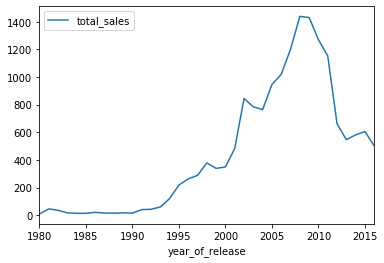

In [89]:
games_years.plot(x='year_of_release')

Можно сказать, что до 1995 года выпускалось слишком мало игр, для того чтобы учитвать их в анализе.
а с 2000 года начался скачок.
Думаю адекватным в дальнейшем отсеить все данные до 2000 года.



#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы

Чтобы проанализировать платформы с самым большими продажами создадим сводную таблицу по продажам и выделим 10 самых больших значений.

In [90]:
platform_top = games.pivot_table(index=['platform'],values='total_sales', aggfunc='sum').nlargest(10,'total_sales')

Выведем наш топ.

In [91]:
display(platform_top)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Создадим список самых популярных платформ.



In [92]:
platform_top_list = platform_top.index

Посмотрим на наш список.

In [93]:
display(platform_top_list)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

Отсортируем датасет, чтобы он включал только самые продаваемые платформы.

In [94]:
platform_top_value = games.query('platform in @platform_top_list')

сгруппируем данные.

In [95]:
platform_top_value_grouped = games.groupby(['platform','year_of_release'])[['total_sales']].sum().reset_index()

Создаем цикл, строящий график для каждой платформы.

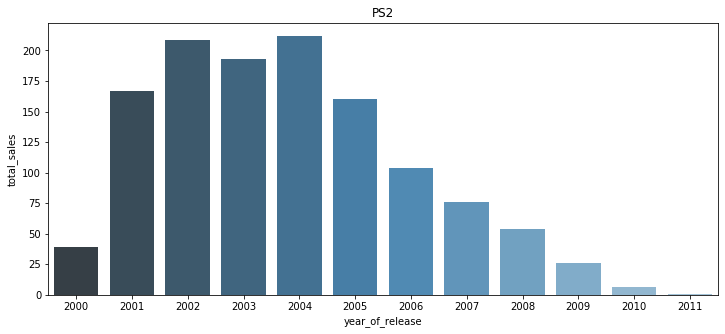

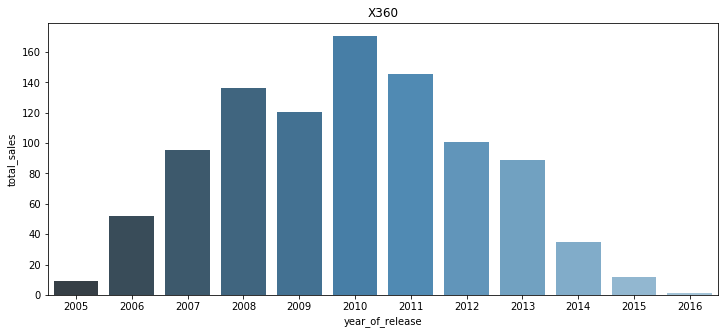

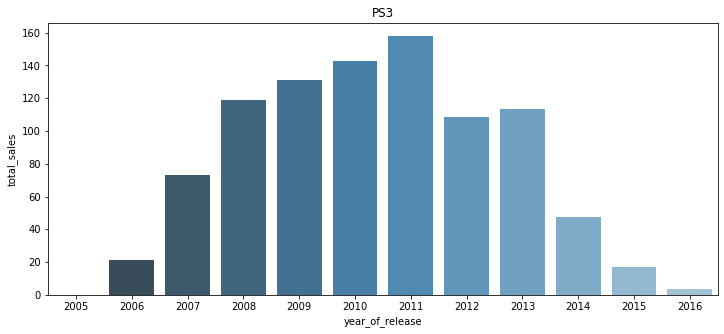

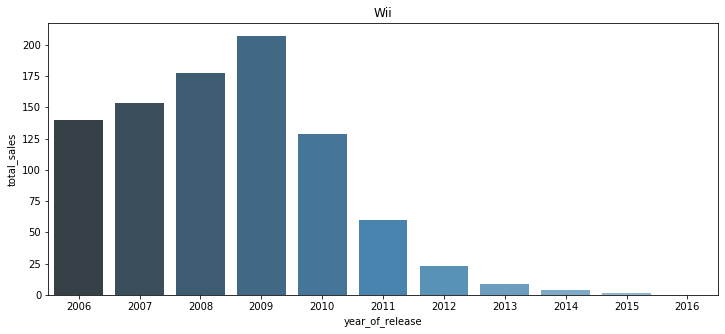

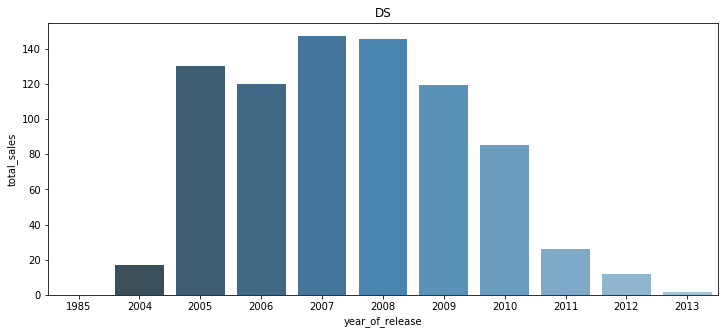

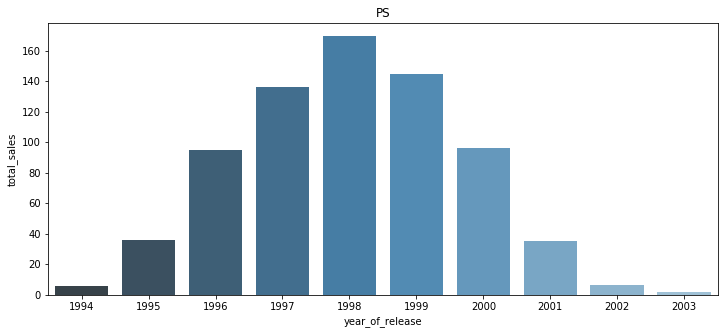

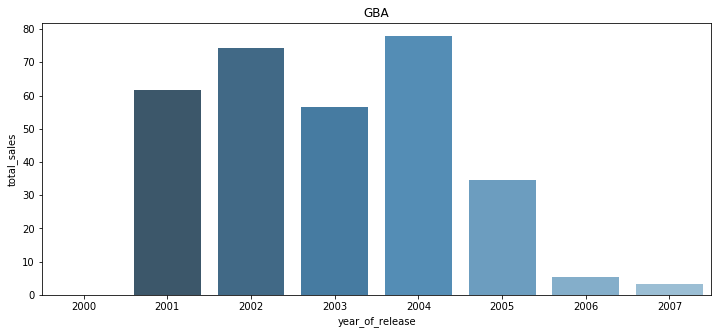

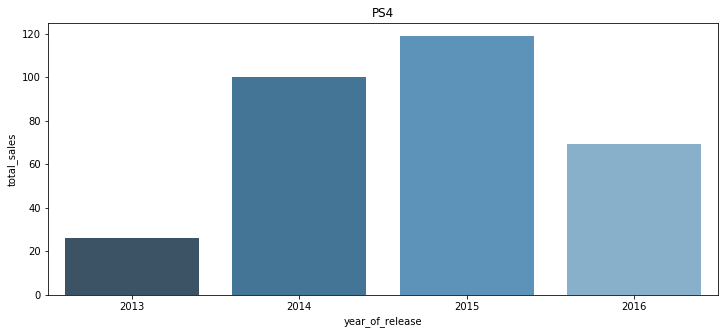

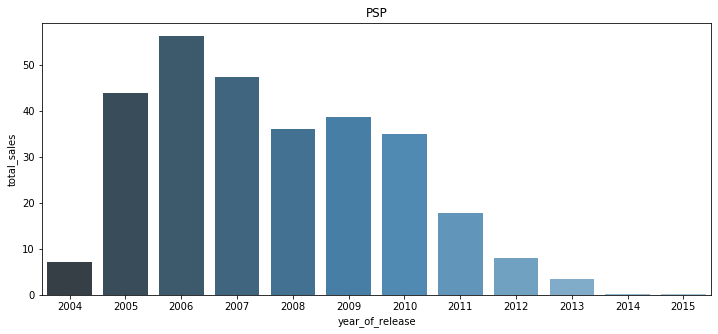

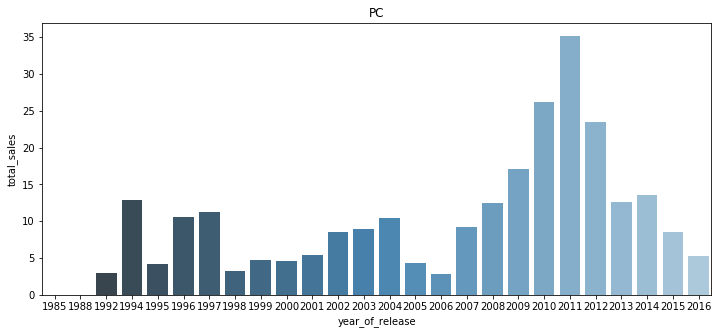

In [96]:
for column in platform_top_list:
    platform_data = platform_top_value_grouped[platform_top_value_grouped['platform'] == column]
    plt.figure(figsize=(12,5))
    plt.title(column)
    sns.barplot(x='year_of_release', y='total_sales', data=platform_data, palette="Blues_d");

Из графиков можно отметить следующие закономерности:
* консоли достигают пика своих продаж на 4-5 году жизни, далее отмечается спад продаж, и концом жизни можно считать 7-8 года. Думаю это связано с выходом нового поколения консолей 
* PC самый долгожитель в списке , имеющий как резкие взлёты так и падения. 

**исходя из наших графиков самой перспективной платформой является PS4, они ещё не достигла своего пика( график это не отображает т.к. данные за 2016 год не полные**



#### Отсеим лишние данные, которые не помогут в дальнейших расчётах.

Учитывая средний срок жизни консоли в 7-8 лет, считаю уместным брать данные за последние 10 лет т.е. с 2006 года



Отсеим данные с помощью **query**

In [97]:
games_good_data = games.query('year_of_release >2006 and platform in @platform_top_list')

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Чтобы понять, какие платформы растут или падают посмотрим на график, по данные сгрупированным по платформе и году.

In [98]:
games_good_data_grouped = games.query('year_of_release >2006 and platform in @platform_top_list').groupby(['platform','year_of_release'])[['total_sales']].sum().reset_index()

Посмотрим на данные, что у нас получились.

In [99]:
display(games_good_data_grouped)

,platform,year_of_release,total_sales
0,DS,2007,147.23
1,DS,2008,145.36
2,DS,2009,119.56
3,DS,2010,85.35
4,DS,2011,26.33
...,...,...,...
61,X360,2012,100.72
62,X360,2013,88.58
63,X360,2014,34.74
64,X360,2015,11.96


Строим график.

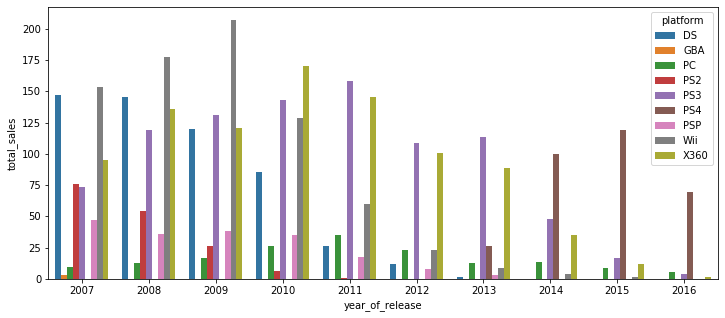

In [100]:
plt.figure(figsize=(12,5))
sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=games_good_data_grouped)

**Вывод:**        
Данные на этом графике подтверждают, что PS4 самая продаваемая и перспективная платформа.
Ближайшие конкурент X360 находится на закате своей жизин и уже не может конкурировать.


**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**


Для того, чтобы понять какие жанры посотрим на сгрупированные данные по количеств игр и по продажам.

Группируем данные.

In [101]:
games_good_data_genre_count = games_good_data.pivot_table(index='genre',values='total_sales', aggfunc=['count','sum']).reset_index()

Меняем значения столбцов для удобства.

In [102]:
games_good_data_genre_count.columns=['genre','count','sum']

Строим графики.

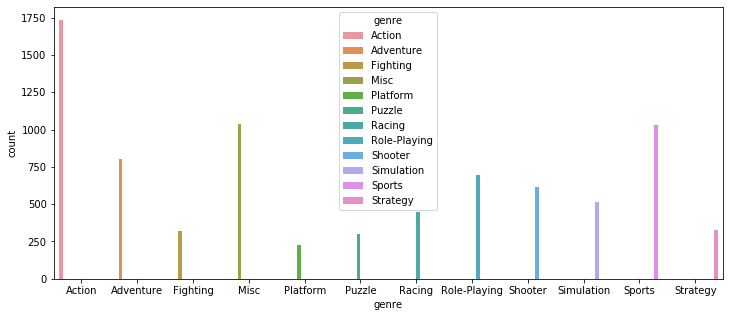

In [103]:
plt.figure(figsize=(12,5))
sns.barplot(x='genre', y='count', hue='genre', data=games_good_data_genre_count)

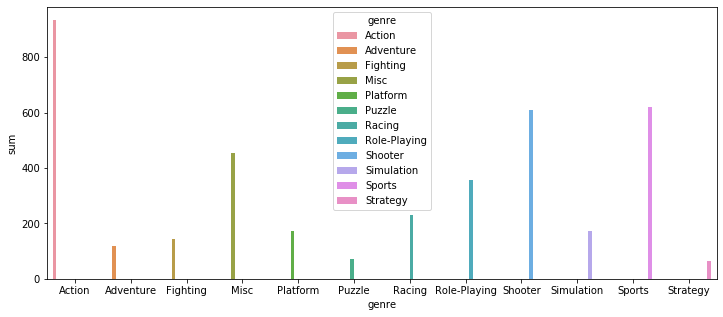

In [104]:
plt.figure(figsize=(12,5))
sns.barplot(x='genre', y='sum', hue='genre', data=games_good_data_genre_count)

In [ ]:
sns.catplot(x="income_bracket",y="age",kind='bar',hue='gender',data=census_data)

Можно сделать вывод, что самые прибыльные жанры:
* action
* shooter
* sports
* misc

По количесту примерно такая же ситуация.



**Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.**


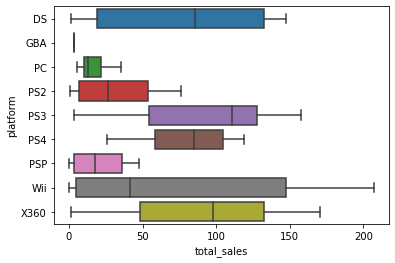

In [105]:
sns.boxplot(y="platform", x="total_sales",data=games_good_data_grouped, orient="h");

Из ящика с усами можно сделать вывод:
* WII была очень популярной платформой одно время, но мы уже выяснили, что её жизнь подошла к концу.
* DS была тоже популярна, но аналогична её эпоха подошла к концу.
* можно предположить, что PS4 вырастет до размеров PS3, так как целевая аудитория фанатов осталось преждней
* Х360 занимал большую долю рынка, но его жизненный цикл тоже подходит к концу.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Рассмотрим на примере PS4.

Построим диагрмму рассеяния.

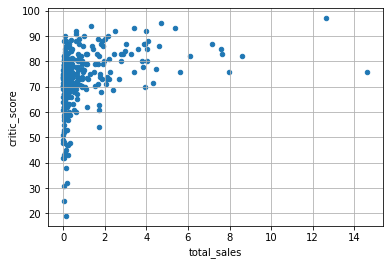

In [106]:
games_good_data[games_good_data['platform'] =="PS4"].plot(x='total_sales', y='critic_score', kind='scatter', grid=True)

Посчитаем корреляцию.

In [107]:
print(games_good_data.query('platform=="PS4"')['total_sales'].corr(games_good_data.query('platform=="PS4"')['critic_score']))

0.3317065191040851


Корреляция достаточно низка, но судя по графику можно сказать, что чем больше оценка тем больше продажи.



#### Шаг 4 Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для того, чтобы найти определить данные запрошенные в задании, необходимо сначала выделить топ5.

создаем сводную таблцу, чтобы выделить топ5 платформ.

In [108]:
platform_top5 = games_good_data.pivot_table(index=['platform'],values='total_sales', aggfunc='sum').nlargest(5,'total_sales')

Убираем индексы.

In [109]:
platform_top5_list = platform_top5.index

Аналогично для жанров.

In [110]:
genre_top5 = games_good_data.pivot_table(index=['genre'],values='total_sales', aggfunc='sum').nlargest(5,'total_sales')

In [111]:
genre_top5_list = genre_top5.index

пишем словари для автоматизации процесса автормления графиков.

In [112]:
region_dict = ['na_sales','eu_sales','jp_sales']
name_of_reg_platform_dict = {'na_sales':'Продажи по консолям в Серевной Америке',
                   'eu_sales':'Продажи по консолям в Европе',
                   'jp_sales':'Продажи по консолям в Японии'}
name_of_reg_genre_dict = {'na_sales':'Продажи по жанрам в Серевной Америке',
                   'eu_sales':'Продажи по жанрам в Европе',
                   'jp_sales':'Продажи по жанрам в Японии'}

name_of_reg_rating_dict = {'na_sales':'Продажи по рейтингу в Серевной Америке',
                   'eu_sales':'Продажи по рейтингу в Европе',
                   'jp_sales':'Продажи по рейтингу в Японии'}

В цикле строим графики.

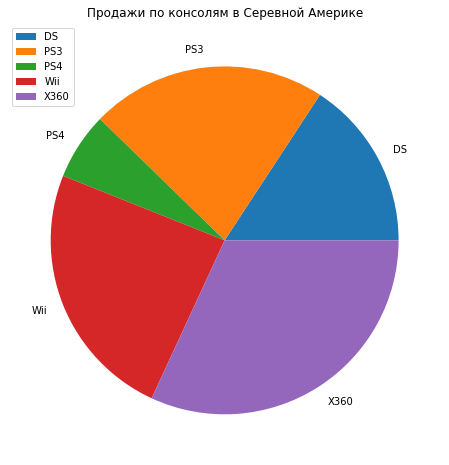

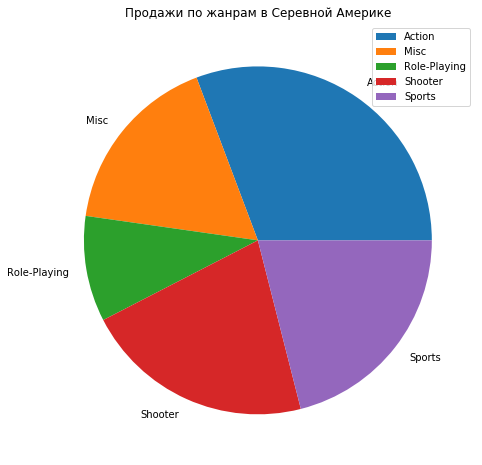

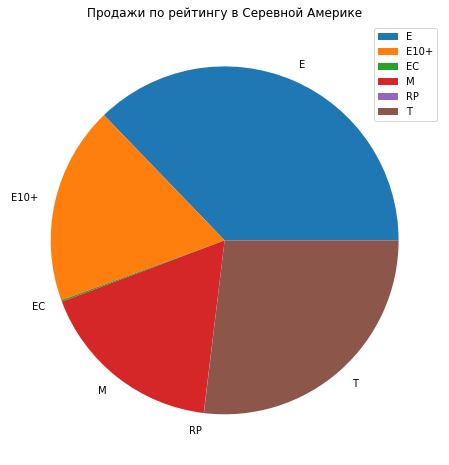

_____________________________________________


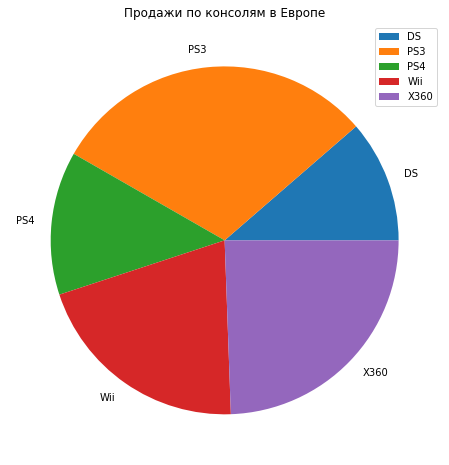

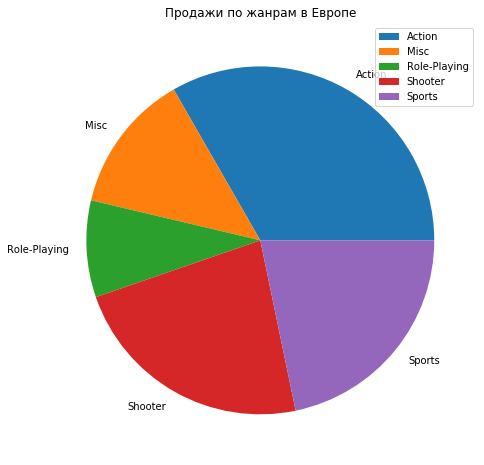

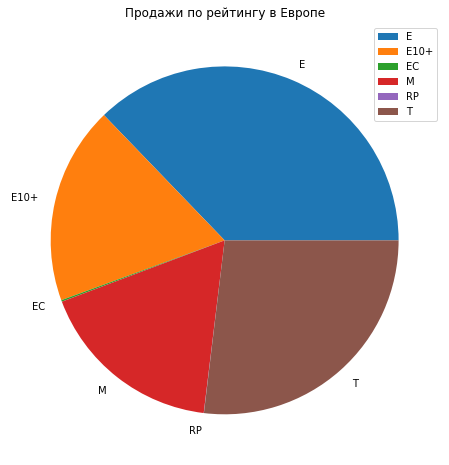

_____________________________________________


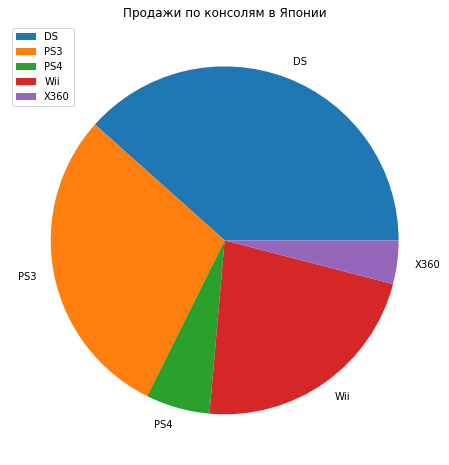

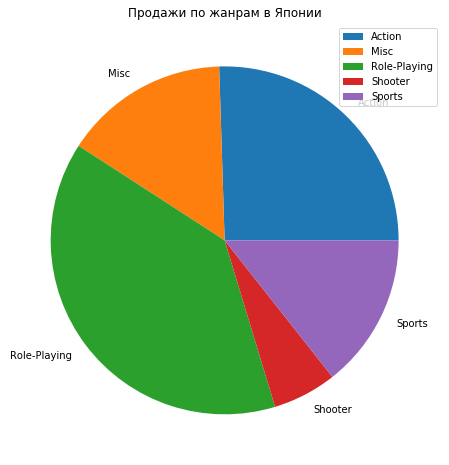

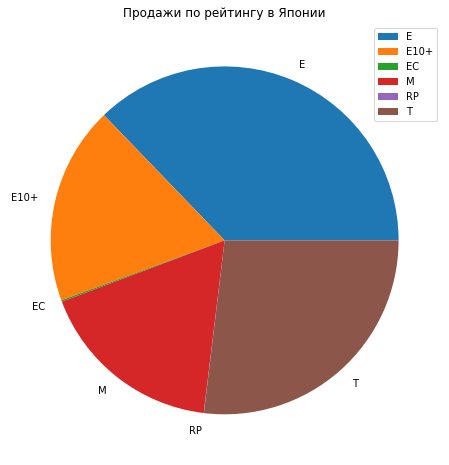

_____________________________________________


In [113]:
for region in region_dict:
    region_data = games_good_data.query('platform in @platform_top5_list').pivot_table(index='platform', values=region, aggfunc='sum')
    region_data.plot(kind='pie', subplots=True, figsize=(8, 8))
    plt.title(name_of_reg_platform_dict[region])
    plt.ylabel("")
    plt.show()
    
    region_data = games_good_data.query('genre in @genre_top5_list').pivot_table(index='genre', values=region, aggfunc='sum')
    region_data.plot(kind='pie', subplots=True, figsize=(8, 8))
    plt.title(name_of_reg_genre_dict[region])
    plt.ylabel("")
    plt.show()
    
    region_data = games_good_data.pivot_table(index='rating', values=region, aggfunc='count')
    region_data.plot(kind='pie', subplots=True, figsize=(8, 8))
    plt.title(name_of_reg_rating_dict[region])
    plt.ylabel("")
    plt.show()
    
    print('_____________________________________________')

**Северная Америка:**
* самая популярная платформа х360
* Самый популярный жанр Action    

**Европа:**
* самая популярная платформа ps3
* самый популярный жанрв Action    

**Япония:**
* самая популярная платформа DS
* самый популярный жанр Role-Playing

**Доля по возрастному рейтингу для всех регионов примерно одинакова.**       

**Можно сказать жанры в Европе и Северной Америка популярны одни и теже, различается лидер по платформат. В остальном ситуация схожа.**



### Шаг 5. Проверьте гипотезы


Нам необходимо проверить следующие теории:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Начнём с "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

Для начала сделаем два новых сета данных, для удобства и лишней проверки, мало ли что то ранее забыл отсеить из  муосрных данных

In [114]:
xbox = games_good_data.query('platform == "X360" and user_score>0').copy()
pc = games_good_data.query('platform == "PC" and user_score>0').copy()

При проверке используем следующие гипотезы:
* Нулевая гипотеза - средние оценки по X360 и PC равны.
* Алтернативная гипотеза - средние различаются.

Проверяем гипотезу.

In [115]:
alpha_cities = 0.01

results_pc_x = st.ttest_ind(
    xbox['user_score'], 
    pc['user_score'])

print('p-значение:', results_pc_x.pvalue)

if (results_pc_x.pvalue < alpha_cities):
    print(color.BOLD + "Отвергаем нулевую гипотезу"  + color.END)
else:
    print(color.BOLD + "Не получилось отвергнуть нулевую гипотезу" + color.END)

p-значение: 0.06757889420708527
Не получилось отвергнуть нулевую гипотезу


Так как у нас не получилось отвергнуть нулевую гипотезу, проверим срение показатели вручную.

In [116]:
print(xbox['user_score'].mean())
print(pc['user_score'].mean())

6.664683628999109
6.788313264492728


Видно, что средние оценки отличаются на 0.1.       
В этом случае могу сказать, что средние оценки равны.
Так как я думаю врядли есть датасеты, где сравниваемые цифры совпадают до десятых или сотых.

**Гипотеза :Средние пользовательские рейтинги платформ Xbox One и PC одинаковые** <font color=red><b>Подтверждена</b></font>

преходим к следующей гипотезе.

**Проверям гипотезу : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Снова создаём датасеты.

In [117]:
action = games.query('genre == "Action" and user_score>0').copy()
sports =games.query('genre == "Sports" and user_score>0').copy()

При проверке используем следующие гипотезы:

* Нулевая гипотеза - средние оценки по Action и Sports равны.
* Алтернативная гипотеза - средние различаются.

Проверяем нулевую гипотезу.

In [118]:
alpha_cities = 0.01

results_genre = st.ttest_ind(
    action['user_score'], 
    sports['user_score'])

print('p-значение:', results_genre.pvalue)

if (results_genre.pvalue < alpha_cities):
    print(color.BOLD + "Отвергаем нулевую гипотезу"  + color.END)
else:
    print(color.BOLD + "Не получилось отвергнуть нулевую гипотезу" + color.END)

p-значение: 0.42197955976416146
Не получилось отвергнуть нулевую гипотезу


Так как не получилось отвергнуть нулевую гипотезу, вручную сравним средние.

In [119]:
print(action['user_score'].mean())
print(sports['user_score'].mean())

7.10856461400091
7.0773469460066005


Разница ещё меньше чем в предущей проверке, считаю, что можно принять эти данные как равные.

**Гипотеза :Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные** <font color=red><b>Отвергнута</b></font>



### Шаг 6. Напишите общий вывод

Из анализа проведённого мной в ходе этой работы можно сделать следующие выводы:
* срок жизни консоли примерно 7-8 лет
* пика продаж она достигает на 4-5 году жизни
* самые популярные жанры Actions, Sports, Shooter
* самые популярные возрастные рейтинги E, T, E10+

Рекомендации на 2017 год:
* необходимо сосредоточиться на платформе PS4, она как раз приближается к периоду пика продаж
* от Х360 стоит отказаться, жизненный цикл этой консоли подходит к концу.
* Можно также поддерживать игры для PC они занимаются второе место после PS4, не смотря на падение их объём ещё сохранятся
* Лучше продавать игры популярных жанров Actions, Sports, Shooter (и Role PLaying для азиатского рынка)
* Нужна присмотреться к анонсам новых консолей у консолей от Microsoft и Nintendo жизненный цикл подходит к концу, скоро явно будут новинки. Консоли Nintedo вседа хорошу стартуют в продажах 